#**Dataset Keras dan Learning Rate**

In [44]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [45]:
print("Ukuran Citra Train",train_images.shape)
print("Ukuran Label Train",train_labels.shape)

print("Ukuran Citra Test",test_images.shape)
print("Ukuran Label Test",test_labels.shape)

Ukuran Citra Train (60000, 28, 28)
Ukuran Label Train (60000,)
Ukuran Citra Test (10000, 28, 28)
Ukuran Label Test (10000,)


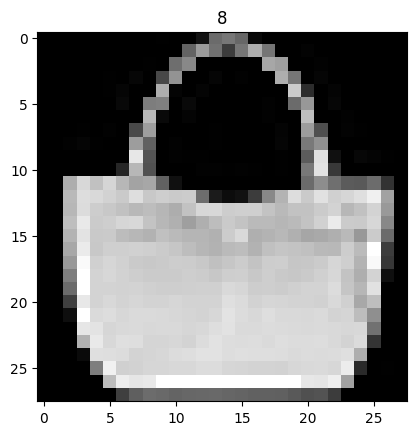

In [46]:
plt.imshow(train_images[100], cmap='gray')
plt.title(train_labels[100])
plt.show()

In [47]:
print(set(train_labels))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


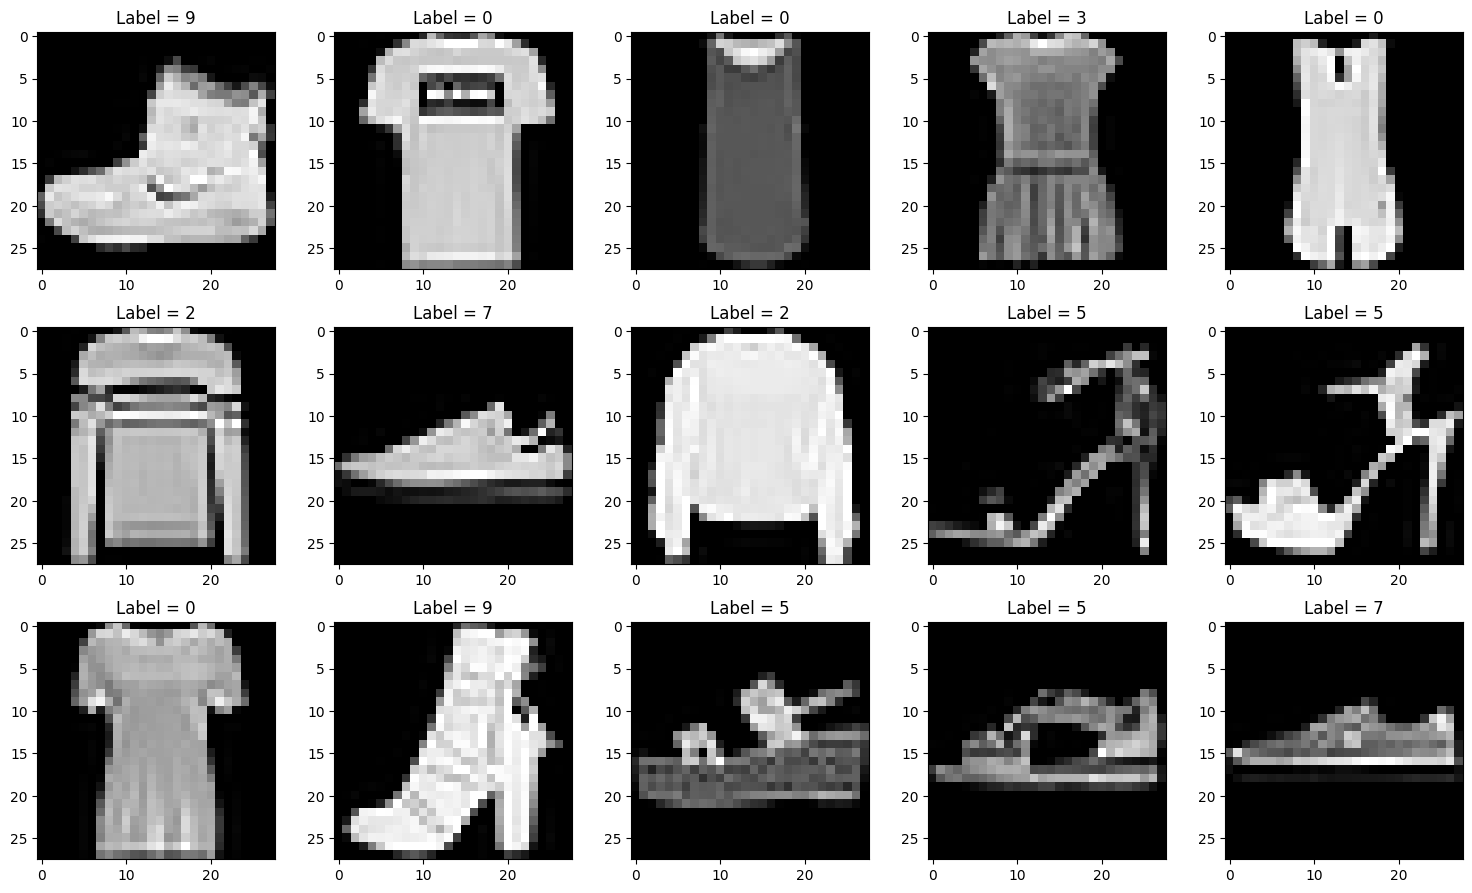

In [51]:
jumlah_baris = 3
jumlah_kolom = 5
jumlah_gambar = 15

gambar, axes = plt.subplots(jumlah_baris, jumlah_kolom, figsize=(3*jumlah_kolom, 3*jumlah_baris))

for i in range(jumlah_gambar):
  gambar = axes[i//jumlah_kolom, i%jumlah_kolom]
  gambar.imshow(train_images[i], cmap='gray')
  gambar.set_title('Label = {}'.format(train_labels[i]))
plt.tight_layout()
plt.show()


In [13]:
2/3

0.6666666666666666

In [14]:
2//3

0

In [17]:
4//3

1

In [18]:
4%3

1

In [19]:
5%3

2

In [20]:
6%3

0

In [59]:
train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype("float32") / 255

test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype("float32") / 255

In [60]:
#Arsitektur Modelnya

import tensorflow as tf
import numpy as np

model = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'sigmoid')
])

In [61]:
model.compile(optimizer ='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [65]:
model.fit(train_images,train_labels, epochs= 100, batch_size=128)

Epoch 1/100
469/469 [==============================] - 5s 11ms/step - loss: 0.2790 - accuracy: 0.8962
Epoch 2/100
469/469 [==============================] - 5s 10ms/step - loss: 0.2656 - accuracy: 0.9007
Epoch 3/100
469/469 [==============================] - 4s 9ms/step - loss: 0.2555 - accuracy: 0.9051
Epoch 4/100
469/469 [==============================] - 5s 11ms/step - loss: 0.2438 - accuracy: 0.9089
Epoch 5/100
469/469 [==============================] - 5s 10ms/step - loss: 0.2352 - accuracy: 0.9122
Epoch 6/100
469/469 [==============================] - 4s 9ms/step - loss: 0.2252 - accuracy: 0.9165
Epoch 7/100
469/469 [==============================] - 5s 10ms/step - loss: 0.2178 - accuracy: 0.9193
Epoch 8/100
469/469 [==============================] - 5s 11ms/step - loss: 0.2116 - accuracy: 0.9213
Epoch 9/100
469/469 [==============================] - 4s 9ms/step - loss: 0.2037 - accuracy: 0.9238
Epoch 10/100
469/469 [==============================] - 5s 10ms/step - loss: 0.1980 -

###**batch size/ukuran batch = ini adalah hyperparameter yang menentukan jumlah contoh training yang digunakan dalam 1 iterasi**

In [68]:
prediksi = model(test_images)
prediksi = prediksi.numpy() # =>supaya hasilnya array
prediksi_label = np.argmax(prediksi,axis=1)
prediksi_betul = prediksi_label == test_labels
print(f"accuracy:{prediksi_betul.mean():.2f}")


accuracy:0.89


In [69]:
prediksi_label

array([9, 2, 1, ..., 8, 1, 5])